# (Prosper Loan Data Exploration)
## by (Passant Hamdi)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan. We are going to Warngle, clean and explore this data.

Prosper Loan Description: A Bid is created when a Lender wishes to lend money to a Borrower in response to a Listing the Borrower created to solicit Bids. Bids are created by specifying an Amount and a Minimum Rate in which the Lender wishes to receive should the Bid win the auction and become a Loan. The Minimum Rate remains private unless the Bid is Outbid by other Bids offering a lower Minimum Rate.

Source : https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading our data and viewing its information.
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

We have two variables that should have unique values. 
1. ListingKey : Unique key for each listing.
3. LoanKey Unique key for each loan.
So we will check for duplicates make sure that all our data are unique.

In [3]:
# Checking for duplicates
df['ListingKey'].nunique(), df['LoanKey'].nunique()

(113066, 113066)

In [4]:
#Removing duplicate values from columns ListingKey, LoanKey and MemberKey
df.drop_duplicates(subset=['ListingKey'],inplace=True)
df.drop_duplicates(subset=['LoanKey'],inplace=True)

The data contains 81 variables so it is very hard to explore all of them, so we choosed some of the variables that have a lot of null values or variables that won't be helpful for our analysis and will remove them. 

In [5]:
# Now we are going to drop 44 columns.
df.drop(['ListingKey', 'ListingNumber', 'CreditGrade', 'ClosedDate', 'EstimatedEffectiveYield', 'EstimatedLoss', 
         'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState',
         'Occupation', 'EmploymentStatusDuration', 'GroupKey', 'CreditScoreRangeLower','CreditScoreRangeUpper', 
         'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
         'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 
         'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 
         'TradesOpenedLast6Months', 'DebtToIncomeRatio','LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
         'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
         'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
         'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'MemberKey'], axis=1,  inplace=True)

In [6]:
# Will check if there are null values in the remaining column
df.isnull().sum()

ListingCreationDate                   0
Term                                  0
LoanStatus                            0
BorrowerAPR                          25
BorrowerRate                          0
LenderYield                           0
ListingCategory (numeric)             0
EmploymentStatus                   2255
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
DateCreditPulled                      0
OpenRevolvingAccounts                 0
OpenRevolvingMonthlyPayment           0
RevolvingCreditBalance             7604
BankcardUtilization                7604
AvailableBankcardCredit            7544
IncomeRange                           0
IncomeVerifiable                      0
StatedMonthlyIncome                   0
LoanCurrentDaysDelinquent             0
LoanOriginalAmount                    0
LoanOriginationDate                   0
LoanOriginationQuarter                0
MonthlyLoanPayment                    0
LP_CustomerPayments                   0


In [7]:
# Yes there are null values that we will drop.
df.dropna(inplace=True)

In [8]:
# Viewing the data structure...
df.shape

(105462, 37)

In [9]:
# Changing 'ListingCreationDate' and 'LoanOriginationDate' to datetime.
df['ListingCreationDate']= pd.to_datetime(df['ListingCreationDate'])
df['LoanOriginationDate']= pd.to_datetime(df['LoanOriginationDate'])

In [10]:
# Extracting year from 'ListingCreationDate' and 'LoanOriginationDate' to use it in our analysis.
df['ListingCreationyear'] = df['ListingCreationDate'].dt.year
df['LoanOriginationyear'] = df['LoanOriginationDate'].dt.year

Source : https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

We need to change the listing categories from numbers to the original categories to be more useful in our exploration.

In [11]:
# First we will change the column name to remove '(numeric)'
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [12]:
# Then replace each number with its category.
df['ListingCategory'].replace({0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 
                             4: 'Personal Loan', 5: 'Student Use', 6: 'Auto',7: 'Other', 8: 'Baby&Adoption', 
                             9: 'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
                             13: 'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 
                             17: 'RV', 18: 'Taxes', 19:'Vacation', 20:'Wedding Loans'}, inplace=True)

Source : https://stackoverflow.com/questions/67039036/changing-category-names-in-a-pandas-data-frame

In [13]:
#Checking our data
df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationyear,LoanOriginationyear
0,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,Not Available,Self-employed,True,True,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,2007
1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,Home Improvement,Employed,False,False,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,2014
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,Motorcycle,Employed,True,False,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,2012
4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,Home Improvement,Employed,True,False,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,2013
5,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,Debt Consolidation,Employed,True,False,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2013,2013


### What is the structure of your dataset?

> After wrangling and cleaning the data there are 105462 columns(loans) with 39 raws(variables)

### What is/are the main feature(s) of interest in your dataset?

> Our main focus will be Borrower APR and exploring what factors affect it most.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We will study the effect of the loan term, status, listing category, borrower employment status, stated monthly income, loan original amount, if the borrower is homeowner or not and loan orgination year. Also if the borrower is currently in group or not and the number of investors.

## Univariate Exploration



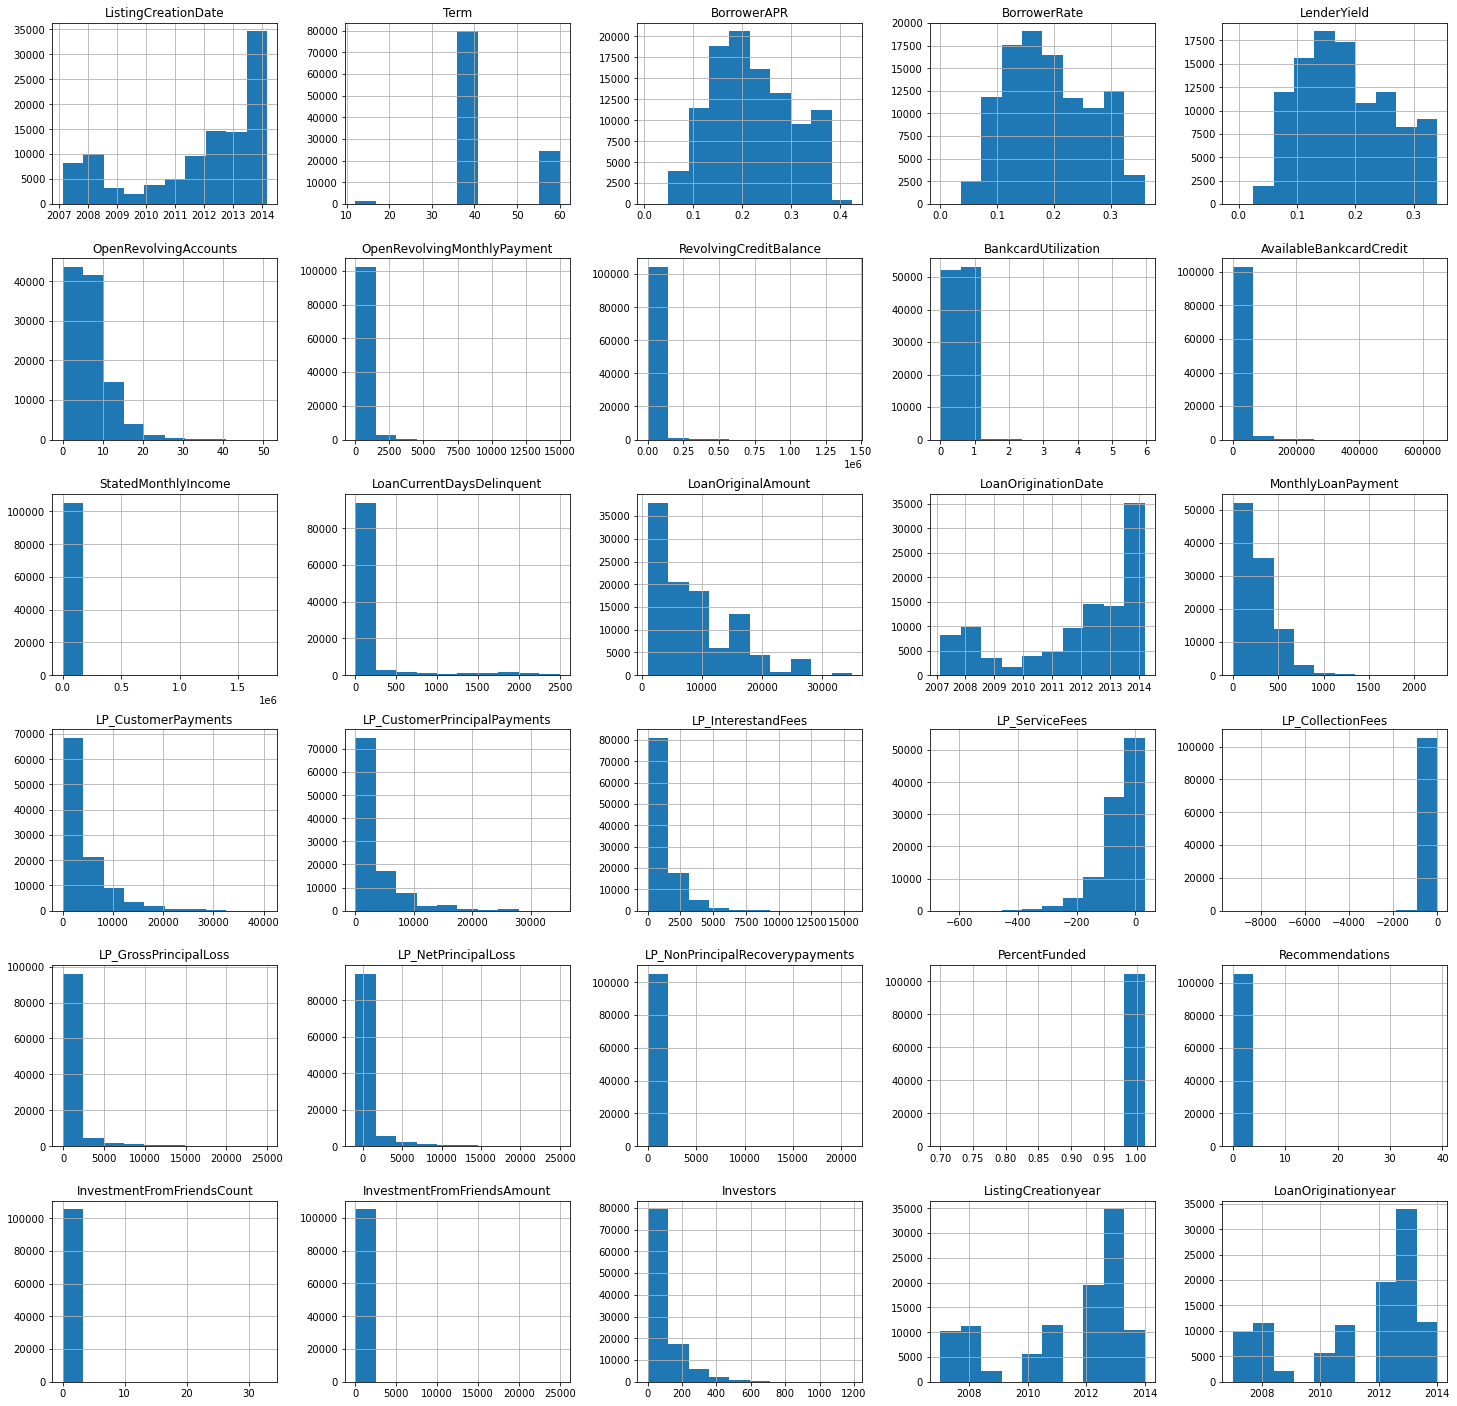

In [14]:
# Let's start with overview for our data.

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
df.hist(ax = ax);

Source : https://stackoverflow.com/questions/43392588/how-to-increase-the-figure-size-of-dataframe-hist-for-pandas-0-11-0/43394059

Now we will start investigating each variable alone.

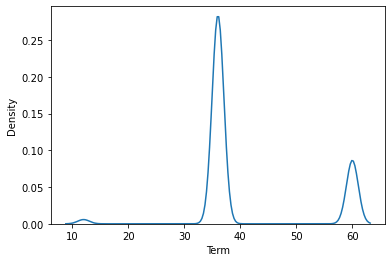

In [15]:
# Starting with Term
sns.kdeplot(x = 'Term', data = df);

So for the term we have the majority of the loans is 36 months and some other loans 60 months and very few is 12 months

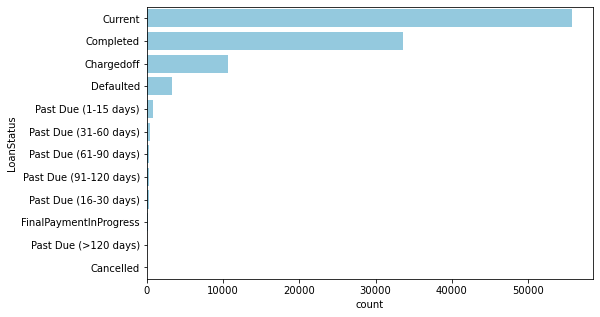

In [16]:
# Now let's see the loan status
plt.figure(figsize=[8, 5])
sns.countplot(y = 'LoanStatus', data = df, order = df['LoanStatus'].value_counts().index, color = 'skyblue');

Most loans are Current, completed, Chargedoff and defaulted.

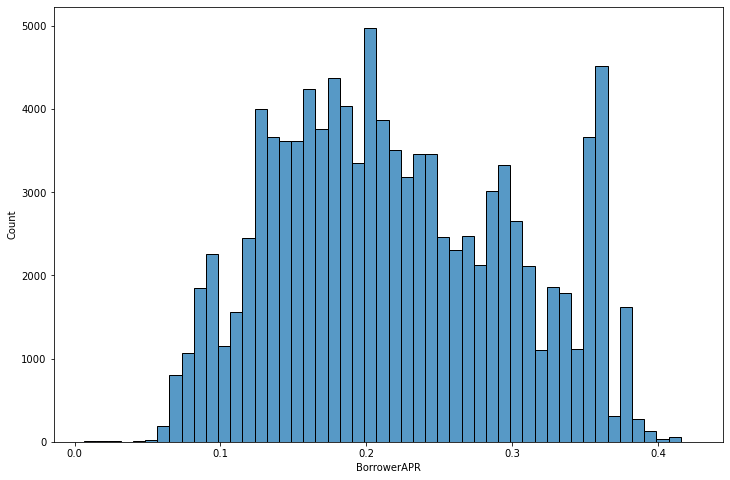

In [17]:
# Cheking the distribution for BorrowerAPR
plt.figure(figsize=[12, 8])
sns.histplot(x = 'BorrowerAPR', data = df, bins = 50);

We Can't say that BorrowerAPR is normally distributed, we have more than one peak. The most common APR is 0.2 and 0.35

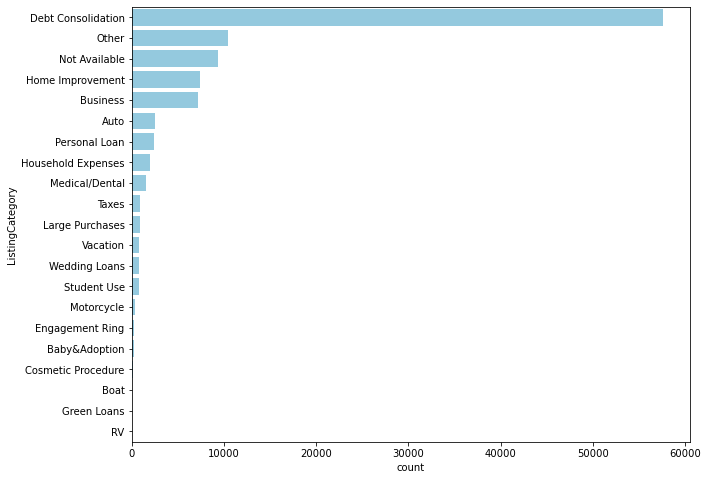

In [18]:
# Checking Listing Category distribution.
plt.figure(figsize=[10, 8])
sns.countplot(y = 'ListingCategory', data = df, order = df['ListingCategory'].value_counts().index, 
              color = 'skyblue' );

Most Borrowers need money for debt consalidation.

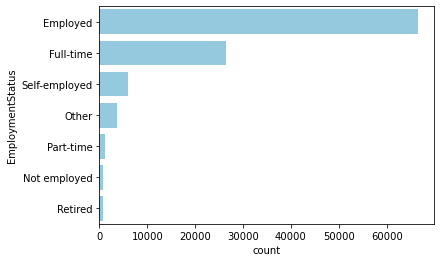

In [19]:
#Let's check the employment status for the borrowers
sns.countplot(y = 'EmploymentStatus', data = df, order = df['EmploymentStatus'].value_counts().index, color = 'skyblue');

The majority of our borrowers are employed specifically full time.

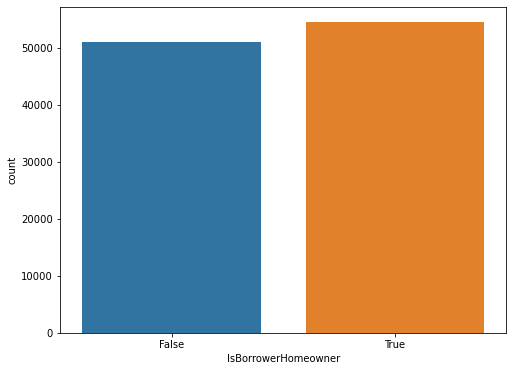

In [20]:
# Let's see if the Brrowers are home owners or not
plt.figure(figsize=[8, 6])
sns.countplot(x = 'IsBorrowerHomeowner', data = df);

We have more home owners among the borrowers.

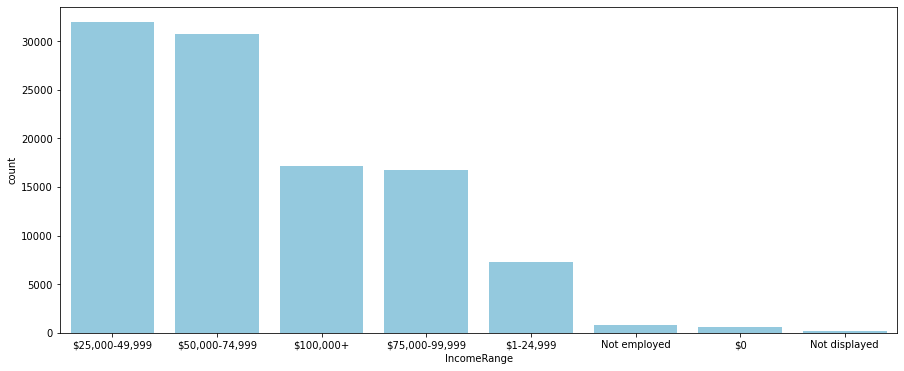

In [21]:
# We need to see IncomeRange distribution
plt.figure(figsize=[15, 6])
sns.countplot(x = 'IncomeRange', data = df, color = 'skyblue');

The income range for most borrowers from  25000 to 75000. 

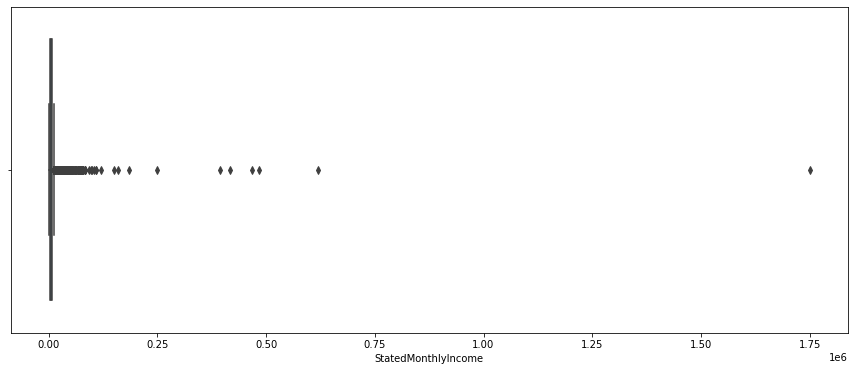

In [22]:
# StatedMonthlyIncome Distribution
plt.figure(figsize=[15, 6])
sns.boxplot(x = 'StatedMonthlyIncome', data = df);

The figure above shows that most borrowers' monthly income between 0 to 250000, except for some outliers.

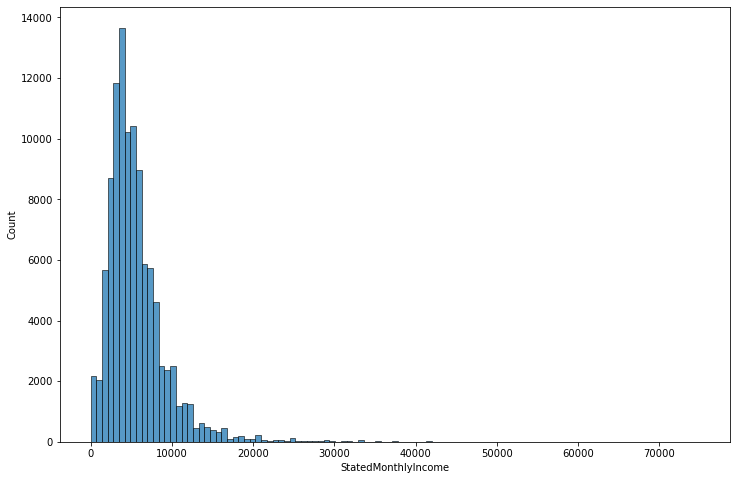

In [23]:
# Let's limit the monthly income to 75000 to better view for the distribution of the majority.
plt.figure(figsize=[12, 8])
bins = np.arange(0, 75000, 700)
sns.histplot(x = 'StatedMonthlyIncome', data = df, bins = bins);

The distibution for stated monthly income is right skewed, with mean less than $5000 

In [24]:
# Let's check summary statistics for StatedMonthlyIncome
df.StatedMonthlyIncome.describe()

count    1.054620e+05
mean     5.667801e+03
std      7.625881e+03
min      0.000000e+00
25%      3.316667e+03
50%      4.750000e+03
75%      6.916667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

The summary confirms that we have very high values for outliers with the mean less than $5000

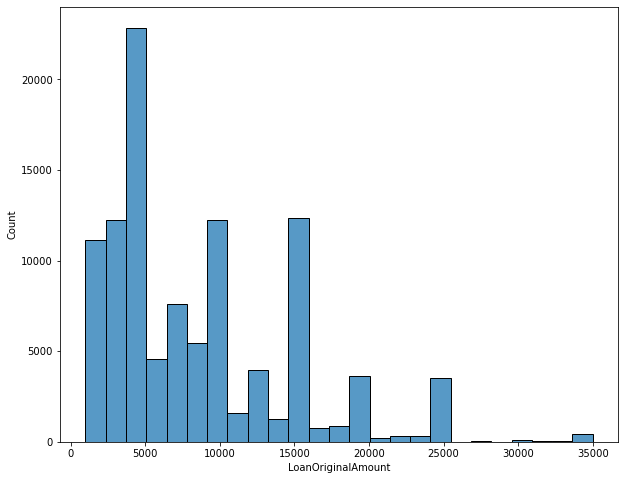

In [25]:
# LoanOriginalAmount Distribution
plt.figure(figsize=[10, 8])
sns.histplot(x = 'LoanOriginalAmount', data = df , bins = 25);

LoanOriginalAmount has several peaks with $5000 is the most frequent one.

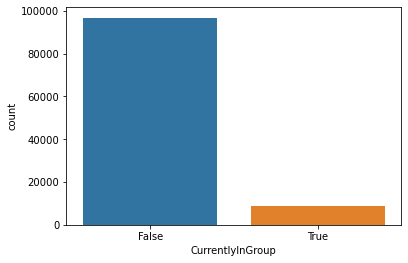

In [26]:
# Finding if borrowers in group or not
sns.countplot(x = 'CurrentlyInGroup', data = df);

No, the majority of borrowers are not in group.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Borrower APR  doesn't follow normal distribution as it has more than one peak. But no there is no unusual points we just need to explore what changes the borrower APR.
> As for the monthly stated income we had to focus on the data up to 75000 so we could identify the actual distribution for the data.
> We transformed the date of the listing creation and the loan origination to datetime and extracted the year to help us in our bivriate analysis. Also, changed the listing categories from numbers to the original categories to give us better insight for the reason most borrowers need the money for.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Before starting the investigation we performed some cleaning to remove duplicates and null values, also removed some of the variables that we won't use in our analysis.

## Bivariate Exploration


We are going to explore the effects of some variables on the Borrower APR(Our main interest).

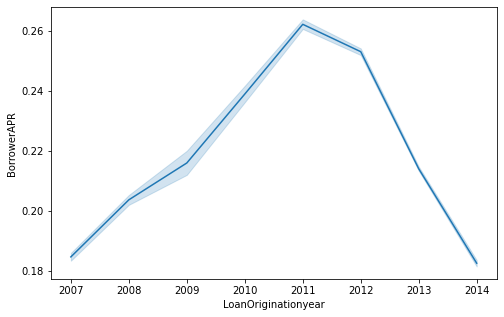

In [27]:
# Let's start with how the borrower APR changed over the years.
plt.figure(figsize=[8, 5])
sns.lineplot(x = 'LoanOriginationyear', y = 'BorrowerAPR', data = df);

The Borrower APR started to increase since 2007 till it reached its highest value in 2011, then started to decrease again till the lowest value at 2014.

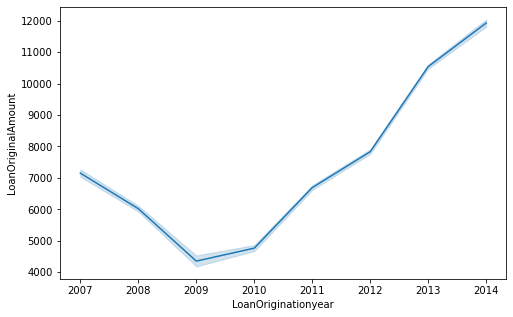

In [28]:
# Let's see the loan amounts over the years
plt.figure(figsize=[8, 5])
sns.lineplot(x = 'LoanOriginationyear', y = 'LoanOriginalAmount', data = df);

The loan amounts increased steadily over the years from 2009 to 2014, as opposed to from 2007 to 2009 it was decreasing.

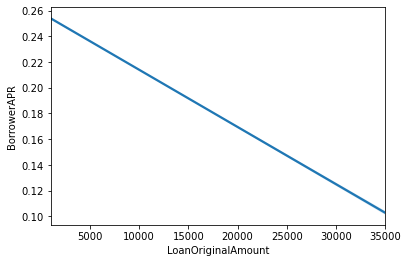

In [29]:
sns.regplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df, scatter = False);

There is negative relationship between LoanOriginalAmount and BorrowerAPR, the more the loan amount, the less the BorrowerAPR.

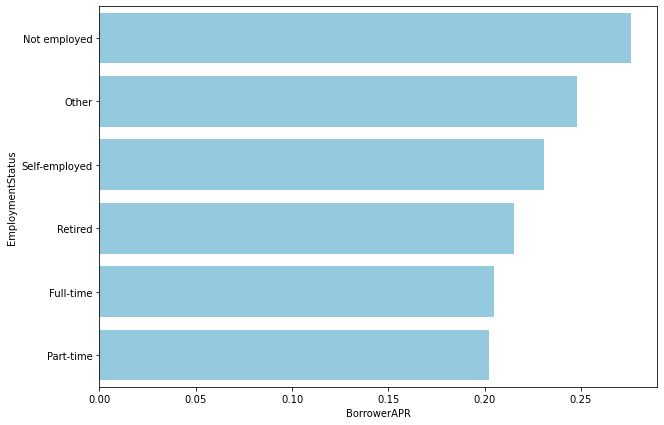

In [30]:
# Relationship between EmploymentStatus and BorrowerAPR
plt.figure(figsize=[10, 7])
sns.barplot(y = 'EmploymentStatus', x = 'BorrowerAPR', data = df, color = 'skyblue',
            order = ['Not employed', 'Other', 'Self-employed', 'Retired', 'Full-time', 'Part-time'], ci = None);

The figure above shows that Employment status affect the borrower APR, the highest APR is for not employed borrowers, and the lowest for those who have full or part time jobs.

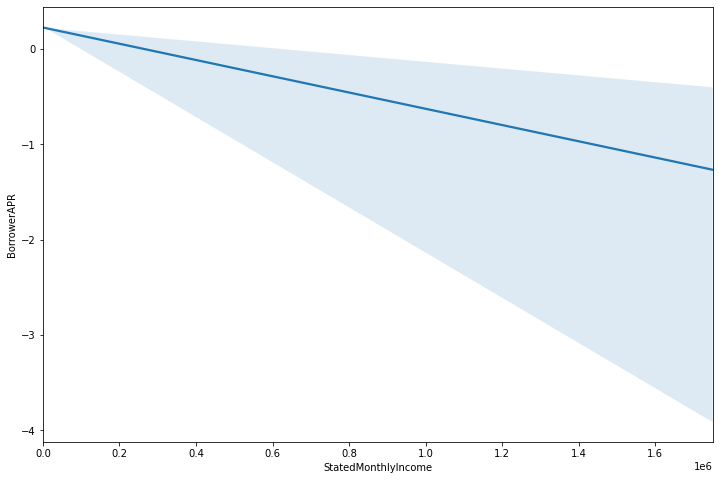

In [31]:
# Check relationship between StatedMonthlyIncome and BorrowerAPR
plt.figure(figsize=[12, 8])
sns.regplot(x = 'StatedMonthlyIncome', y = 'BorrowerAPR' , data = df, scatter = False);

it's not conclusive because the majority of our data is concentrated in very small area so we will limit the monthly income to 75000 and see if we can get better result or not.

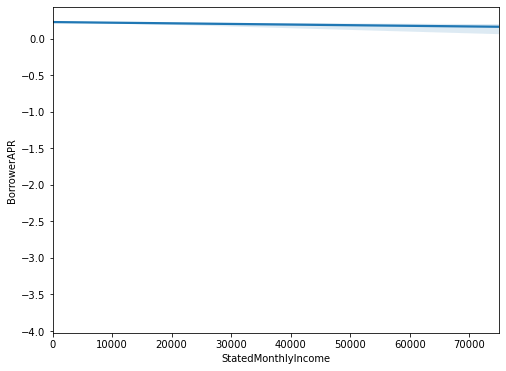

In [32]:
# Check relationship between StatedMonthlyIncome and BorrowerAPR afetr limiting x axis to 75000
plt.figure(figsize=[8, 6])
plt.xlim([0, 75000])
sns.regplot(x = 'StatedMonthlyIncome', y = 'BorrowerAPR' , data = df, scatter = False);

The Borrower APR does not seem affected by the stated monthly income, maybe except for when the monthly income is extremely high the APR will decrease.

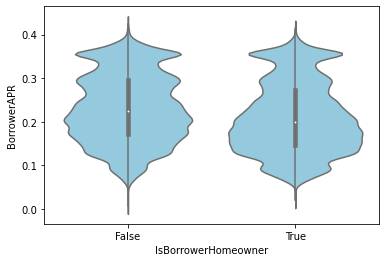

In [33]:
# Does owning home affects the BorrowerAPR?
sns.violinplot(x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', data = df, color = 'skyblue');

Yes, The average BorrowerAPR for home owners is slightly less than for borrowers who don't own home. 

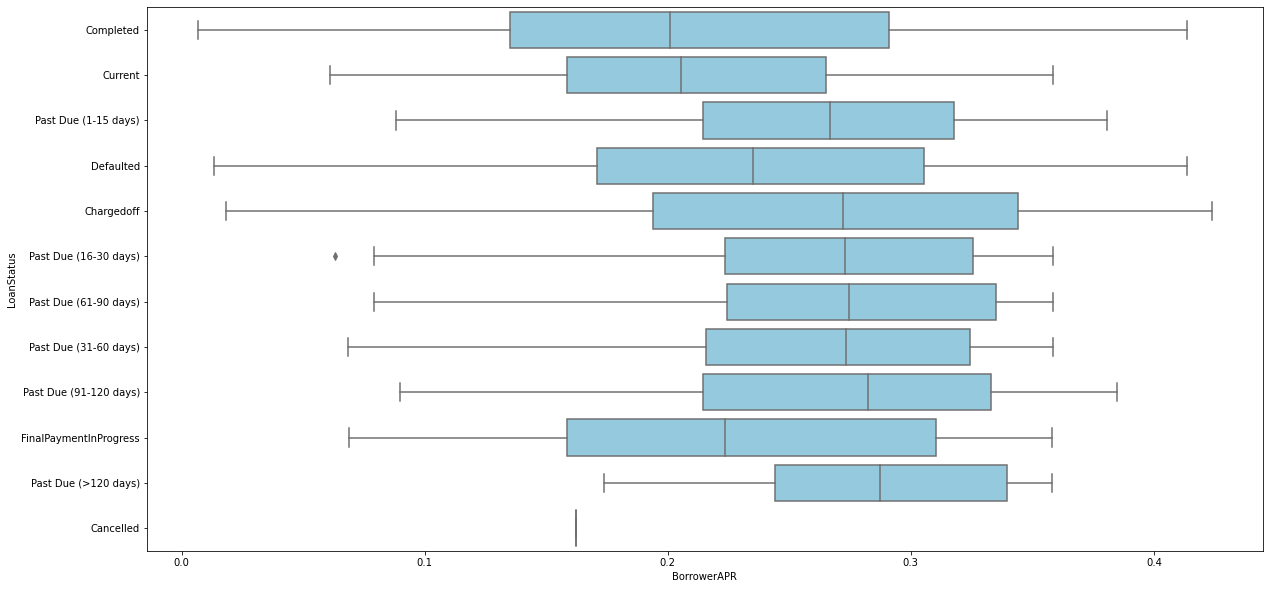

In [34]:
# exploring the relationship between LoanStatus and BorrowerAPR
plt.figure(figsize=[20, 10])
sns.boxplot(y = 'LoanStatus', x = 'BorrowerAPR', data = df, color = 'skyblue');

From the figure above we can see that the completed loans have on average the least borrower APR. So here the loan status is affected by the borrower APR as the less APR the more likely for the borrower to pay on time.

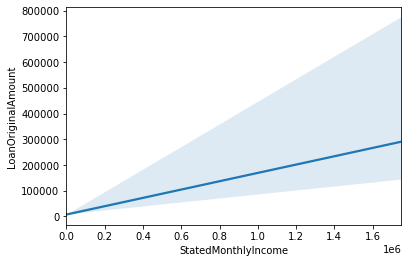

In [35]:
#Is there relationship between LoanOriginalAmount and StatedMonthlyIncome?
sns.regplot(x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', data = df, scatter = False);

So yes when the stated monthly income increases the loan amount increase.

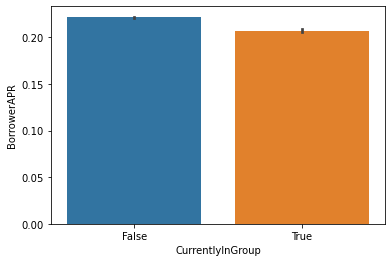

In [36]:
# Let's see if being in a group affects the APR
sns.barplot(x = 'CurrentlyInGroup', y = 'BorrowerAPR', data = df);

The average of borrowerAPR is lower for borrowers who belong to a group.

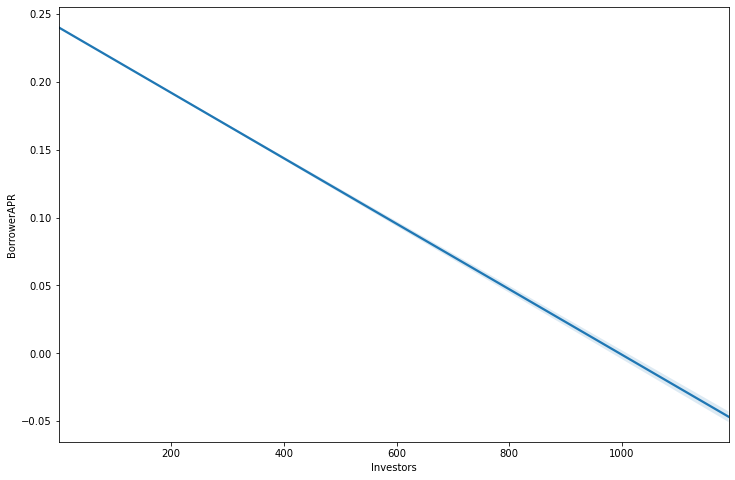

In [37]:
# Does number of investors affect borrower APR?
plt.figure(figsize=[12, 8])
sns.regplot(x = 'Investors', y = 'BorrowerAPR', data = df, scatter = False);

When the number of investors increase, the value of borrower APR decreases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From 2007 to 2011, Borrower APR was increasing, then starting from 2011 it decreased till it reached the lowest value at 2014.
> Borrower APR decreases when the loan amount increases.
> Employment status affects APR, not employed borrowers have the highest APR values.
> Loan status seems affected by the borrower APR, the completed loans have the lowest APR values.
> Borrower APR is lower for the borrowers who belong to groups.
> Borrower APR decreases when the number of investors increase.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We found that loan amounts is increasing since 2009. Also, it increases with the stated monthly income.

## Multivariate Exploration


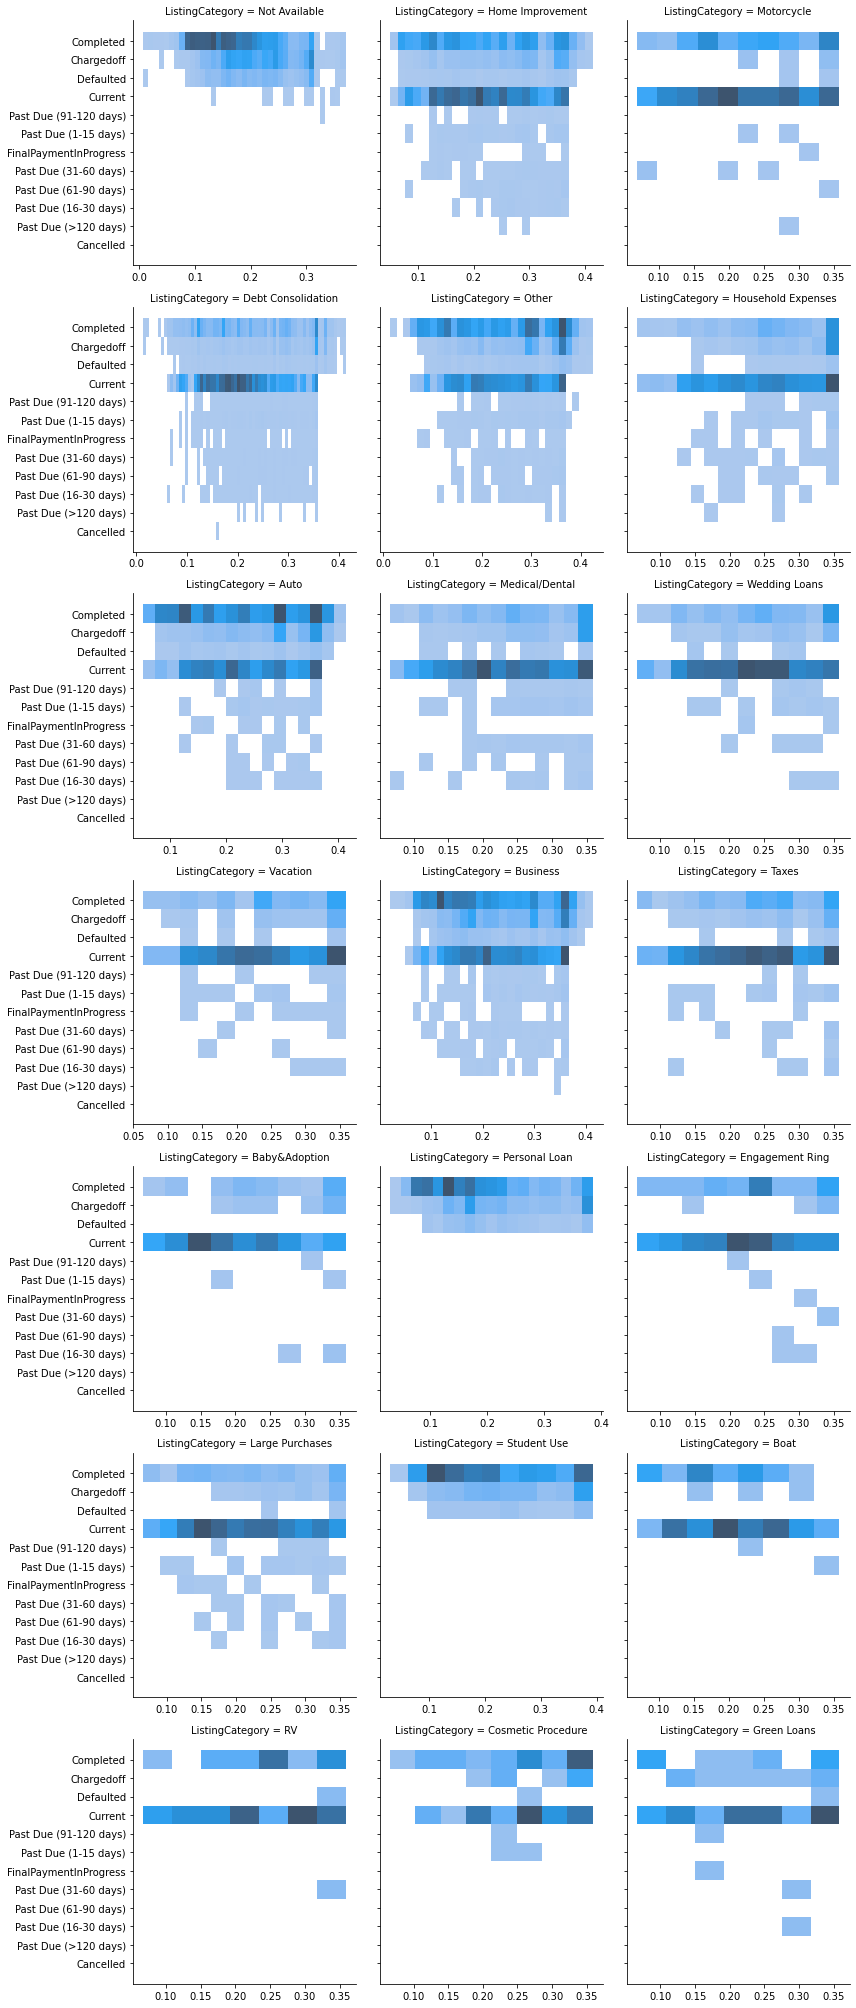

In [38]:
#Relationship between loan status and borrower APR according to each listing category.
g = sns.FacetGrid(df, col='ListingCategory', height = 4, col_wrap = 3,  sharex = False)
g.map_dataframe(sns.histplot, y='LoanStatus', x = 'BorrowerAPR', data = df);

We tried to capture the effect of each listing category on both borrower APR and loan status, It is not very conclusive but we can see that most of the not completed loans are due to home improvement, debt consalidation and business.

As for APR values, for current loans motorcycle, vacation, cosmetic procedure and green loans have the highest values of APR reaching 0.35.

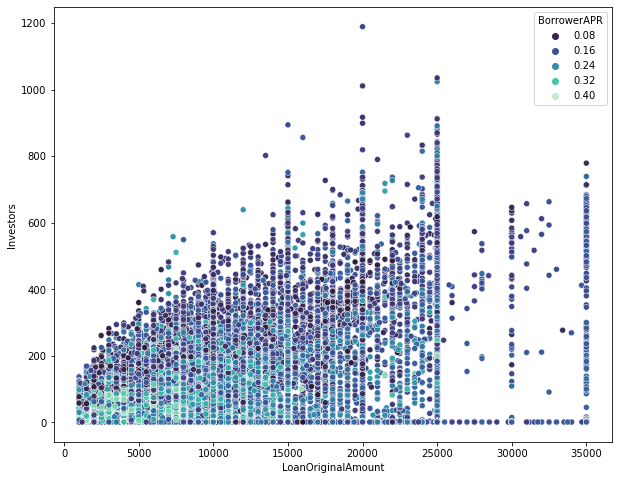

In [39]:
# Let's see the relationship between listing categories, home owners and ARP
plt.figure(figsize=[10, 8])
sns.scatterplot(x = 'LoanOriginalAmount', y = 'Investors', hue = 'BorrowerAPR' , data = df, palette = 'mako');

The highest values of APR are when the loan amount and the number of investors is small.

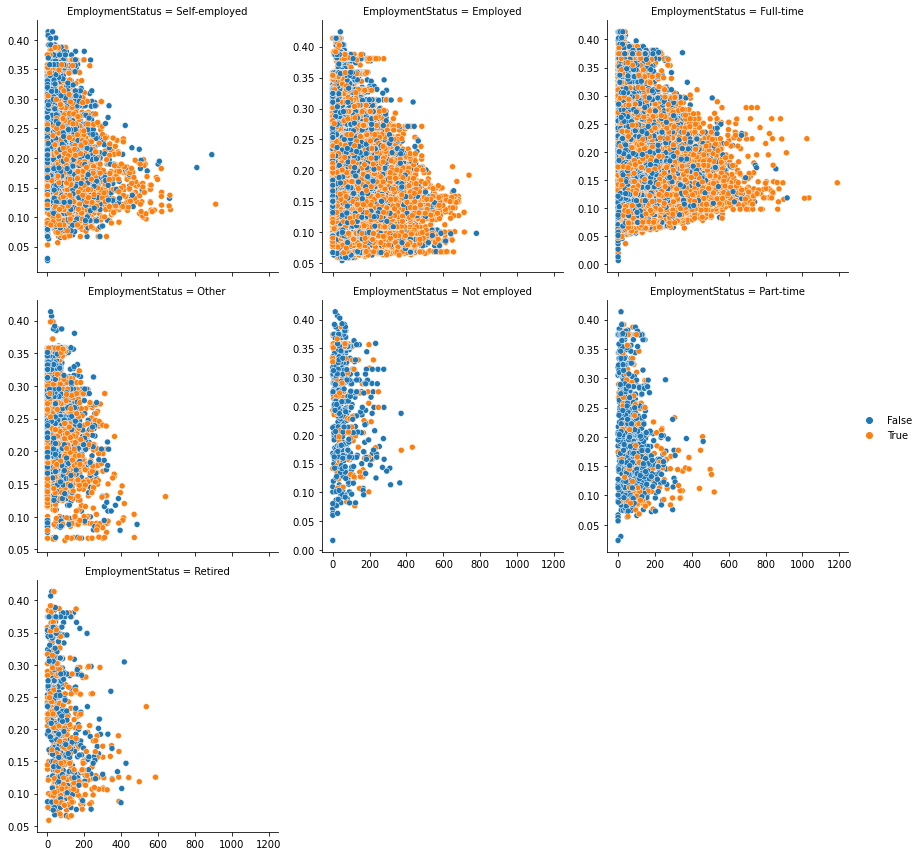

In [40]:
# Exploring the effect of employment status and owning home on borrower APR 
g = sns.FacetGrid(df, col='EmploymentStatus', height = 4, col_wrap = 3,  sharey = False)
g.map_dataframe(sns.scatterplot, y = 'BorrowerAPR', x = 'Investors', hue = 'IsBorrowerHomeowner')
g.add_legend();

The number of investors is significally high for borrowers with full time jobs, and when the number of investors increase the APR value decreases. Also, homeowners have more investors.

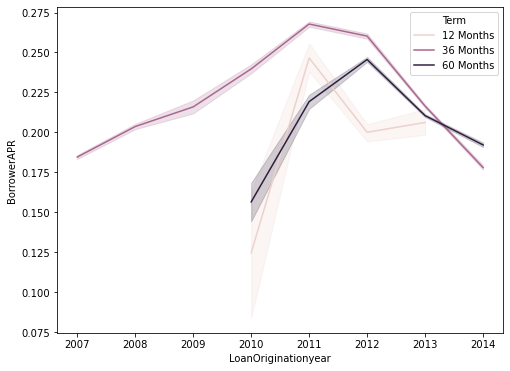

In [41]:
plt.figure(figsize=[8, 6])
sns.lineplot(x = 'LoanOriginationyear', y = 'BorrowerAPR', data = df , hue = 'Term' , legend = False);
plt.legend(title='Term', labels=['12 Months', '36 Months', '60 Months']);

36 months loans have the highest borrower APR, except that by the start of 2014 the 60 months loans seemed slightly higher. 12 months loans had the lowest APR but it ended at 2013.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The number of investors increase with large amounts of loans, also the APR decreases.
> Borrowers with stable employment status have more investors and lower values of APR, Owning home too may increase the number of investors and decrease the APR value.

### Were there any interesting or surprising interactions between features?

> For the loan term it was surprising that 36 months term have higher APR values than 60 months, but that started to change by 2014. 